In [1]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter
sns.set_style('darkgrid')

In [2]:
path = 'circuitos_oscilantes_acoplados/'

In [3]:
def ten_pow(n): return 10 ** n

In [4]:
v = np.array([13.7, 89.61, 141., 224.2, 261.6, 311.6, 357.1, 394.4, 450.9, 506.1, 588.9, 663.6, 715.3, 752.2, 815.7, 860.1, 901.5, 955.2, 1001, 1050, 287, 325.9, 375.4, 415.4, 430.2, 470.8, 522.2, 540.2, 560.4, 607.5, 619.6, 640.2, 406.5, 342.5, 243.7, 250, 210.1, 423, 409.2, 413.2, 407.8, 418.6, 423.7, 428.1, 420.9])
U_R_S = np.array([12.8, 12.8, 12.8, 13.4, 13.6, 14.6, 19.4, 19., 12.6, 15.4, 17.2, 17.8, 18, 18.2, 18.4, 18.6, 18.6, 18.6, 18.6, 18.8, 24, 26.6, 27.2, 4.8, 6.48, 11.1, 7.12, 7.36, 7.44, 7.68, 7.76, 7.84, 12.2, 29.6, 23.6, 23.8, 23.2, 6.08, 5.04, 4.72, 7.4, 1.52, 1.9, 2.68, 1.84])
epsilon = np.array([1.2, 1.2, 1.2, 1.2, 2, 2.8, 7.6, 22, 10.8, 6.8, 5.6, 5.2, 4.8, 4.4, 4, 4.8, 4, 4, 4, 4, 3.2, 6, 16., 18., 11.8, 7.2, 3.2, 3., 3., 2.6, 2.6, 2.6, 30.8, 8.4, 2.4, 2.4, 2.4, 16, 13.4, 15.8, 18.2, 7., 6.2, 6., 6.2])

In [5]:
v_2 = np.array([27.67, 73.1, 84, 87.8, 103.8, 123, 140.2, 155.8, 170.4, 180.5, 201.6, 227.8, 250.0, 300.1, 360., 411.9, 454.1, 502.5, 550, 602.4, 654.2, 700.3, 750.8, 810.4, 866.8, 904.2, 954.9, 1010, 406.8, 401, 395.3, 391.5, 385.8, 416.7, 420.9, 425.9, 429.6, 436.3, 388.9, 389.4, 390.6, 387.6, 366.2, 371.2, 376.2, 380.7, 433.3, 440.1, 445.2, 451.7, 460.4, 388.2, 386.4, 380.4, 442.9, 448.4])
U_R_S_2 = np.array([17.6, 18.0, 17.8, 17.8, 17.8, 18, 18.4, 18.2, 18.4, 16.6, 16.8, 13.2, 13.4, 14.6, 19.6, 11.8, 10.6, 16.0, 17.4, 18.2, 18.6, 19., 19., 19.4, 19.6, 19.4, 19.6, 19.6, 16.8, 13.2, 10.2, 10.6, 14.4, 12.8, 15.6, 16.8, 8.6, 5.92, 5.68, 6, 5.92, 8.48, 14.4, 27.8, 32.4, 26.2, 7.52, 7.04, 8.48, 10.6, 12.1, 12.8, 20.8, 19, 7.36, 9.52])
epsilon_2 = np.array([32 / 1000, 60 / 1000, 0.144, 60 / 1000, 48 / 1000, 72 / 1000, 0.156, 64 / 1000, 84 / 1000, 128 / 1000, 204 / 1000, 124 / 1000, 180 / 1000, 456 / 1000, 3.72, 12.4, 5.8, 1.8, 1.2, 1.00, 0.8, 0.6, 0.6, 0.7, 0.7, 0.6, 0.6, 0.6, 20.4, 19.6, 21., 22.2, 15., 14, 18.8, 22., 14.4, 11.4, 11., 11.2, 11.2, 12.4, 4, 10.4, 17., 18.6, 16., 10., 7.60, 5.6, 4.2, 19.4, 23, 18.8, 9.6, 6.8])

In [6]:
R_S = .997 * ten_pow(6) # M \ohms
R_1 = 21.8 * ten_pow(3) # k \ohms
C_1 = .997 * ten_pow(-9) # nF
L_1 = 152 * ten_pow(-6) # mu H
v_0 = 1 / (2 * m.pi * m.sqrt(L_1 * C_1))

R_2 = 21.3 * ten_pow(3) # k \ohms
C_2 = .999 * ten_pow(-9) # nF
L_2 = 150 * ten_pow(-6) # mu H

In [7]:
delta_R_S = (.008 * .997) + .001 # M \ohms
delta_R_1 = (.008 * 21.8) + .1 # K \ohms
delta_C_1 = (.01 * .997) + (5 * .001) # nF
delta_L_1 = (.02 * .152) + (8 * .001) # mH

delta_R_2 = (.008 * 21.3) + .1 # K \ohms
delta_C_2 = (.01 * .999) + (5 * .001) # nF
delta_L_2 = (.02 * .150) + (8 * .001) # mH


cut_freq = (1 / (2 * np.pi * np.sqrt(L_1 * C_1))) / 1000
cut_freq_err = cut_freq * 0.5 * np.sqrt(((delta_L_1 / .152) ** 2) + ((delta_C_1 / .997) ** 2))

In [8]:
print(fr'Frequência de corte: {cut_freq} ± {cut_freq_err} kHz')

Frequência de corte: 408.83753253130396 ± 15.161200988310211 kHz


In [9]:
'''SEM ACOPLAMENTO'''

df_1 = pd.DataFrame(
    {
        'v [kHz]' : v,
        'U_R_S [mV]' : U_R_S,
        'epsilon [mV]' : epsilon
    }
).sort_values(by='v [kHz]')

df_1['eta'] = (df_1['v [kHz]'] / v_0) * 1000
df_1['|epsilon_over_U_R_S_x_R_S_over_R|'] = (np.abs((df_1['epsilon [mV]'] / df_1['U_R_S [mV]'] * (R_S / R_1)) * 10) / 1000)
df_1.reset_index(drop=True, inplace=True)
#df_1.drop(index=19, inplace=True)
#df_1.reset_index(drop=True, inplace=True)

In [10]:
'''COM ACOPLAMENTO'''

df_2 = pd.DataFrame(
    {
        'v [kHz]' : v_2,
        'U_R_S [mV]' : U_R_S_2,
        'epsilon [mV]' : epsilon_2
    }
).sort_values(by='v [kHz]')

df_2['eta'] = (df_2['v [kHz]'] / v_0) * 1000
df_2['|epsilon_over_U_R_S_x_R_S_over_R|'] = (np.abs((df_2['epsilon [mV]'] / df_2['U_R_S [mV]'] * (R_S / R_2)) * 10) / 1000) * 100
df_2.reset_index(drop=True, inplace=True)
#df_2.drop(index=19, inplace=True)
#df_2.reset_index(drop=True, inplace=True)

In [11]:
df_1

,v [kHz],U_R_S [mV],epsilon [mV],eta,|epsilon_over_U_R_S_x_R_S_over_R|
0,13.70,12.80,1.2,0.033510,0.042876
1,89.61,12.80,1.2,0.219182,0.042876
2,141.00,12.80,1.2,0.344880,0.042876
3,210.10,23.20,2.4,0.513896,0.047311
4,224.20,13.40,1.2,0.548384,0.040956
5,243.70,23.60,2.4,0.596080,0.046509
6,250.00,23.80,2.4,0.611490,0.046118
7,261.60,13.60,2.0,0.639863,0.067256
8,287.00,24.00,3.2,0.701990,0.060979
9,311.60,14.60,2.8,0.762161,0.087709


In [12]:
df_2

,v [kHz],U_R_S [mV],epsilon [mV],eta,|epsilon_over_U_R_S_x_R_S_over_R|
0,27.67,17.60,0.032,0.067680,0.085105
1,73.10,18.00,0.060,0.178800,0.156025
2,84.00,17.80,0.144,0.205461,0.378668
3,87.80,17.80,0.060,0.214755,0.157778
4,103.80,17.80,0.048,0.253891,0.126223
5,123.00,18.00,0.072,0.300853,0.187230
6,140.20,18.40,0.156,0.342924,0.396846
7,155.80,18.20,0.064,0.381080,0.164598
8,170.40,18.40,0.084,0.416791,0.213686
9,180.50,16.60,0.128,0.441496,0.360925


# Sem acoplamento

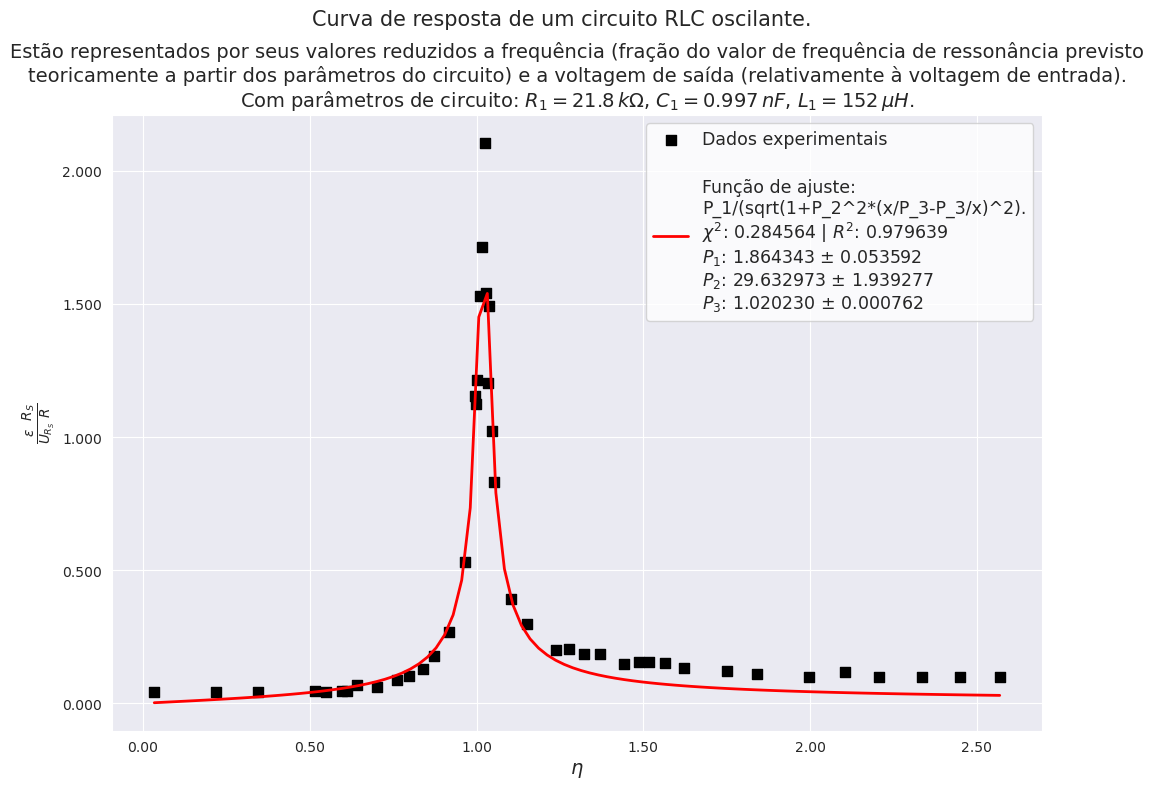

In [13]:
# Função de ajuste
def final_fit(eta, P1, P2, P3):
    return P1 / np.sqrt(1 + P2**2 * ((eta / P3) - (P3 / eta))**2)

# Supondo que df_1 seja o DataFrame contendo as colunas 'eta' e 'final'
# Parâmetros iniciais (P1, P2, P3)
initial_params = [1, 1, 1]

# Ajuste dos dados
params_final, pcov_final = curve_fit(final_fit, df_1['eta'], df_1['|epsilon_over_U_R_S_x_R_S_over_R|'], p0=initial_params)
P1_fit, P2_fit, P3_fit = params_final
P1_err, P2_err, P3_err = np.sqrt(np.diag(pcov_final))

# Curva ajustada
eta_values = np.linspace(min(df_1['eta']), max(df_1['eta']), 100)
final_fit_curve = final_fit(eta_values, P1_fit, P2_fit, P3_fit)

# Cálculo do chi-square e do R-squared
residuals_final = df_1['|epsilon_over_U_R_S_x_R_S_over_R|'] - final_fit(df_1['eta'], *params_final)
chi_square_final = np.sum(residuals_final ** 2)
r_squared_final = 1 - (np.sum(residuals_final ** 2) / np.sum((df_1['|epsilon_over_U_R_S_x_R_S_over_R|'] - np.mean(df_1['|epsilon_over_U_R_S_x_R_S_over_R|'])) ** 2))

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste:' + '\n' + 'P_1/(sqrt(1+P_2^2*(x/P_3-P_3/x)^2).'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square_final, r_squared_final)
legend_P1 = r'$P_1$: {:.6f} $\pm$ {:.6f}'.format(P1_fit, P1_err)
legend_P2 = r'$P_2$: {:.6f} $\pm$ {:.6f}'.format(P2_fit, P2_err)
legend_P3 = r'$P_3$: {:.6f} $\pm$ {:.6f}'.format(P3_fit, P3_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_P1, legend_P2, legend_P3])

# Funções de formatação dos ticks
def format_x_ticks(x, pos):
    return f'{x:.2f}'

def format_ticks(y, pos):
    if y == 0:
        return '0.000'
    else:
        formatted = f'{y:.4g}'
        if 'e' in formatted or 'E' in formatted:
            formatted = f'{float(formatted):.4f}'
        else:
            if '.' in formatted:
                integer_part, decimal_part = formatted.split('.')
                while len(decimal_part) < 3:
                    decimal_part += '0'
                formatted = f'{integer_part}.{decimal_part}'
            else:
                formatted += '.000'
        return formatted

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
#plt.suptitle(r'Ajuste da Função Especificada', fontsize=15)
plt.suptitle(r'Curva de resposta de um circuito RLC oscilante.', fontsize=15, y=1.012)
plt.title('Estão representados por seus valores reduzidos a frequência (fração do valor de frequência de ressonância previsto'+ "\n" +'teoricamente a partir dos parâmetros do circuito) e a voltagem de saída (relativamente à voltagem de entrada).' + '\n' + fr'Com parâmetros de circuito: $R_1 = 21.8 \, k\Omega$, $C_1 = 0.997 \, nF$, $L_1 = 152 \, \mu H$.', fontsize=14)
plt.scatter(df_1['eta'], df_1['|epsilon_over_U_R_S_x_R_S_over_R|'], marker='s', s=50, color='black', label='Dados experimentais')
plt.plot(eta_values, final_fit_curve, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.xlabel(r'$\eta$', fontsize=14)
plt.ylabel(r'$\frac{\epsilon}{U_{R_S}} \frac{R_S}{R}$', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.legend(facecolor='white', fontsize=12.5, loc='best')
plt.savefig(path + '|epsilon_over_U_R_S_x_R_S_over_R|_versus_eta_ajuste.pdf.pdf', bbox_inches='tight')
plt.show()

In [14]:
R_theory = R_1 / P1_fit
delta_R = (R_theory / 1000) * np.sqrt((delta_R_1 / 21.8) ** 2 + (P1_err / P1_fit) ** 2)
Q_theory = R_1 * np.sqrt(C_1 / L_1)
delta_Q = Q_theory * np.sqrt(((delta_R_1 / 21.8) ** 2) + (1 / 4) * ((delta_C_1 / .997) ** 2) + (1 / 4) * ((delta_L_1 / .150) ** 2)) 

# Com acoplamento

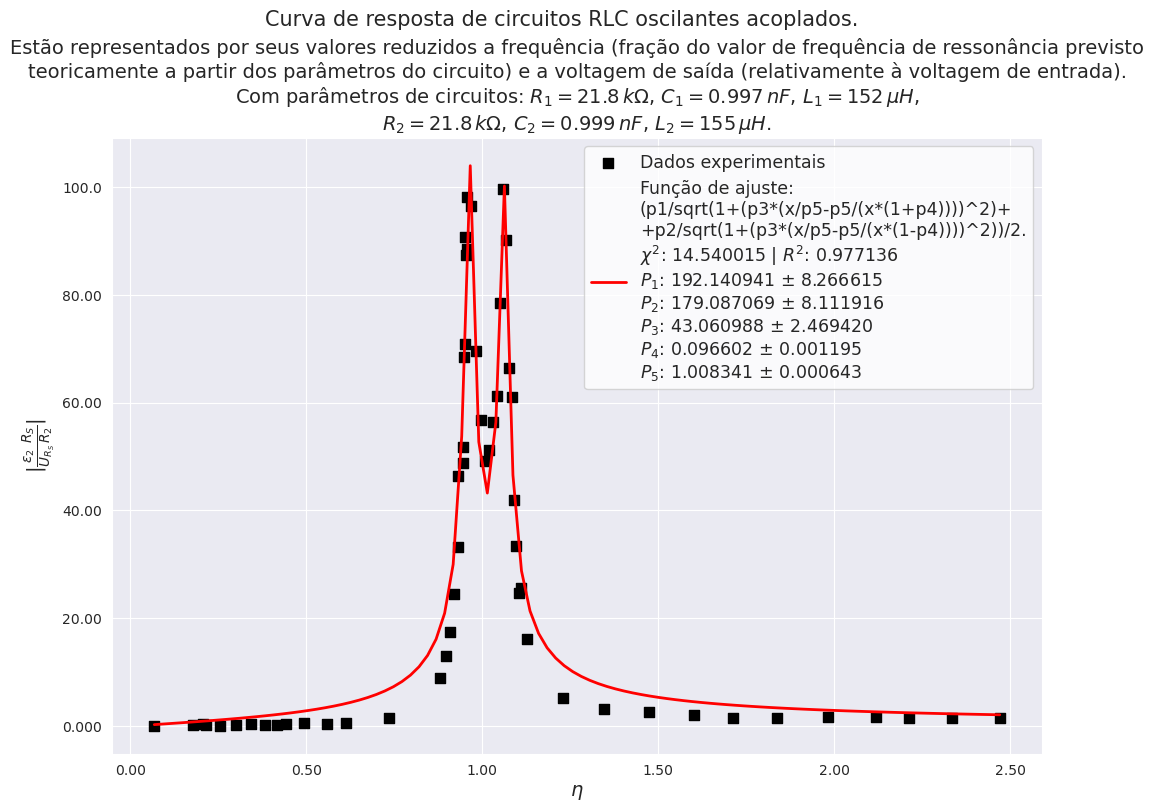

In [15]:
# Função de ajuste fornecida (adaptada para o novo eixo y)
def ajuste_func(eta, P_1, P_2, P_3, P_4,  P_5):
    term1 = (eta / P_5) - (P_5 / eta) * (1 / (1+P_4))
    term2 = (eta / P_5) - (P_5 / eta) * (1 / (1-P_4))
    part1 = P_1 / np.sqrt(1 + P_3 ** 2 * term1 ** 2)
    part2 = P_2 / np.sqrt(1 + P_3 ** 2 * term2 ** 2)
    return 0.5 * (part1 + part2)

# Estimativas iniciais razoáveis
p0 = [110, 110, 40, 0.1, 0.99]

# Ajuste dos parâmetros com limites relaxados
#param_bounds = ([0, 0, 0, 0, -0.9999], [np.inf, np.inf, np.inf, np.inf, 0.9999])
params, pcov = curve_fit(ajuste_func, df_2['eta'], df_2['|epsilon_over_U_R_S_x_R_S_over_R|'], p0=p0, maxfev=20000)

P_1_fit, P_2_fit, P_3_fit, P_4_fit, P_5_fit = params
P_1_fit_err, P_2_fit_err, P_3_fit_err, P_4_fit_err, P_5_fit_err = np.sqrt(np.diag(pcov))

# Curva ajustada
eta_values = np.linspace(min(df_2['eta']), max(df_2['eta']), 100)
ajuste_curve = ajuste_func(eta_values, *params)

# Cálculo do chi-square e do R-squared
residuals = df_2['|epsilon_over_U_R_S_x_R_S_over_R|'] - ajuste_func(df_2['eta'], *params)
chi_square = np.sum(residuals ** 2)
r_squared = 1 - (np.sum(residuals ** 2) / np.sum((df_2['|epsilon_over_U_R_S_x_R_S_over_R|'] - np.mean(df_2['|epsilon_over_U_R_S_x_R_S_over_R|'])) ** 2))

# Formatar strings para inclusão na legenda
#legend_title = r'Função de ajuste: $\frac{1}{2} \left[ \frac{P_1}{\sqrt{1 + Q^2 \left[ \frac{\eta}{P_5} - \frac{P_5}{\eta} \frac{1}{(1 + P_4)} \right]^2}} + \frac{P_2}{\sqrt{1 + Q^2 \left[ \frac{\eta}{P_5} - \frac{P_5}{\eta} \frac{1}{(1 - P_4)} \right]^2}} \right]$'
legend_title = 'Função de ajuste:' + '\n' + '(p1/sqrt(1+(p3*(x/p5-p5/(x*(1+p4))))^2)+' + '\n' +'+p2/sqrt(1+(p3*(x/p5-p5/(x*(1-p4))))^2))/2.'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square / 100, r_squared)
legend_P_1 = r'$P_1$: {:.6f} $\pm$ {:.6f}'.format(P_1_fit, P_1_fit_err)
legend_P_2 = r'$P_2$: {:.6f} $\pm$ {:.6f}'.format(P_2_fit, P_2_fit_err)
legend_P_3 = r'$P_3$: {:.6f} $\pm$ {:.6f}'.format(np.abs(P_3_fit), P_3_fit_err)
legend_P_4 = r'$P_4$: {:.6f} $\pm$ {:.6f}'.format(P_4_fit, P_4_fit_err)
legend_P_5 = r'$P_5$: {:.6f} $\pm$ {:.6f}'.format(P_5_fit, P_5_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_P_1, legend_P_2, legend_P_3, legend_P_4,  legend_P_5])

# Funções para formatação dos ticks
def format_x_ticks(x, pos):
    return f'{x:.2f}'

def format_ticks(y, pos):
    if y == 0:
        return '0.000'
    elif y == 100:
        return '100.0'
    elif y < 100:
        formatted = f'{y:.4g}'  # Formatação com 4 algarismos significativos
        if '.' in formatted:
            integer_part, decimal_part = formatted.split('.')
            while len(decimal_part) < 3:
                decimal_part += '0'
            formatted = f'{integer_part}.{decimal_part}'
        else:
            formatted += '.00'
        return formatted
    else:
        # Para valores fora do intervalo [0, 100], pode-se usar outra lógica
        formatted = f'{y:.4f}'
        return formatted

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Curva de resposta de circuitos RLC oscilantes acoplados.', fontsize=15, y=1.040)
plt.title('Estão representados por seus valores reduzidos a frequência (fração do valor de frequência de ressonância previsto'+ "\n" +'teoricamente a partir dos parâmetros do circuito) e a voltagem de saída (relativamente à voltagem de entrada).' + '\n' + fr'Com parâmetros de circuitos: $R_1 = 21.8 \, k\Omega$, $C_1 = 0.997 \, nF$, $L_1 = 152 \, \mu H$,' + '\n' + fr'$R_2 = 21.8 \, k\Omega$, $C_2 = 0.999 \, nF$, $L_2 = 155 \, \mu H$.', fontsize=14)
plt.scatter(df_2['eta'], df_2['|epsilon_over_U_R_S_x_R_S_over_R|'], marker='s', s=50, color='black', label='Dados experimentais')
plt.plot(eta_values, ajuste_curve, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.xlabel(r'$\eta$', fontsize=14)
plt.ylabel(r'$\left| \frac{\epsilon_2}{U_{R_S}} \frac{R_S}{R_2} \right|$', fontsize=14)  # Ajuste do rótulo do eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.legend(facecolor='white', fontsize=12.5, loc='best')
plt.savefig(path + '|epsilon_over_U_R_S_x_R_S_over_R|_versus_eta_acoplado_ajuste.pdf', bbox_inches='tight')
plt.show()

In [16]:
L_i = ((21.8) ** 2 * .997) / (np.abs(P_3_fit) ** 2) * 1000
delta_L_i = L_i * np.sqrt(4 * ((delta_R_1 / 21.8) ** 2) + ((delta_C_1 / .997) ** 2) + 4 * ((P_3_fit_err / P_3_fit) ** 2)) 

L_ii = ((21.3) ** 2 * .999) / (np.abs(P_3_fit) ** 2) * 1000
delta_L_ii = L_ii * np.sqrt(4 * ((delta_R_2 / 21.3) ** 2) + ((delta_C_2 / .999) ** 2) + 4 * ((P_3_fit_err / P_3_fit) ** 2)) 

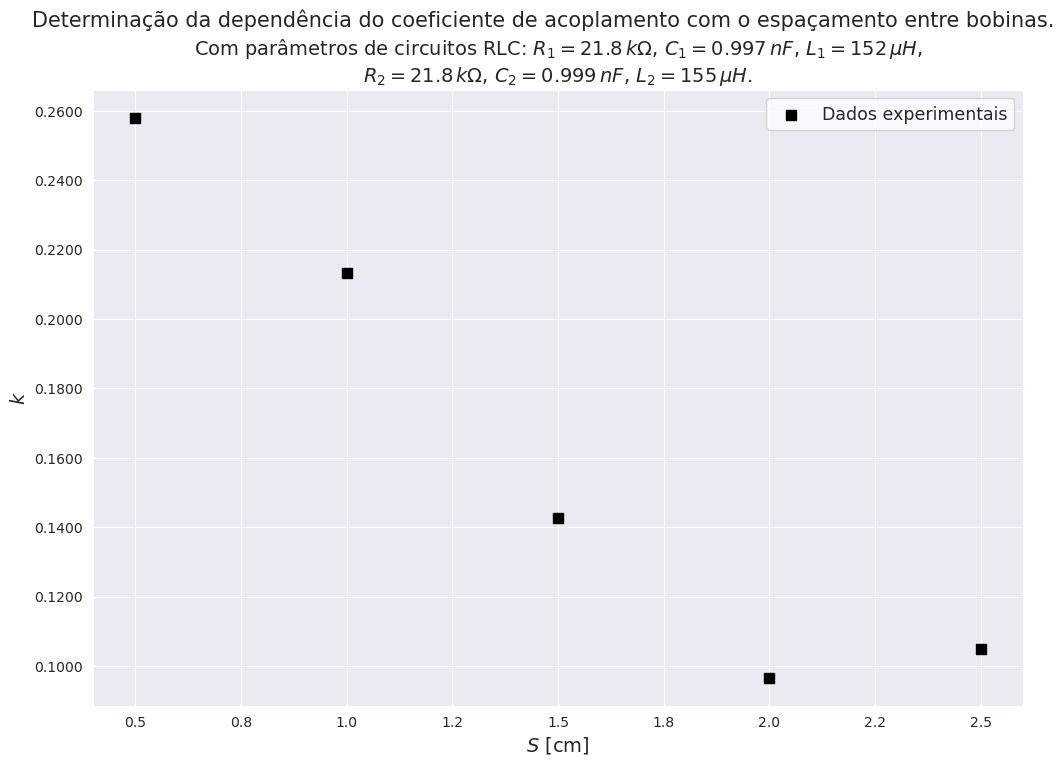

In [17]:
S = np.array([5, 10, 15, 20, 25]) / 10  # em cm
k = np.array([0.258, 0.21322, 0.14253487209781, 0.09660217425720573, 0.105])  # valores de k
k_err = np.array([0.002, 0.00216, 0.001051705777109, 0.0011947537746243775, 0.001])  # incertezas de k

# Funções para formatação dos ticks
def format_x_ticks(x, pos):
    return f'{x:.1f}'

def format_ticks(y, pos):
    return f'{y:.4f}'

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Determinação da dependência do coeficiente de acoplamento com o espaçamento entre bobinas.', fontsize=15, y=.980)
plt.title(fr'Com parâmetros de circuitos RLC: $R_1 = 21.8 \, k\Omega$, $C_1 = 0.997 \, nF$, $L_1 = 152 \, \mu H$,' + '\n' + fr'$R_2 = 21.8 \, k\Omega$, $C_2 = 0.999 \, nF$, $L_2 = 155 \, \mu H$.', fontsize=14)
plt.scatter(S, k, marker='s', s=50, color='black', label='Dados experimentais')
plt.xlabel(r'$S$ [cm]', fontsize=14)
plt.ylabel(r'$k$', fontsize=14)  # Ajuste do rótulo do eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.legend(facecolor='white', fontsize=12.5, loc='best')
plt.savefig(path + 'k_over_S.pdf', bbox_inches='tight')
plt.show()

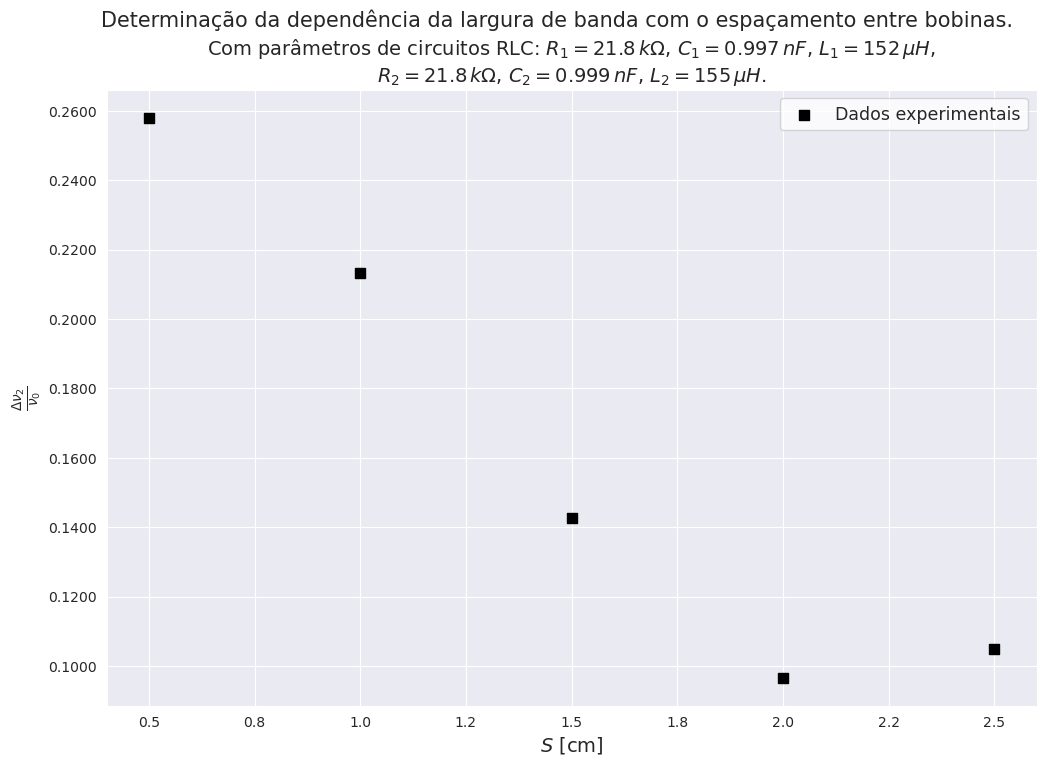

In [18]:
def delta_V_2_over_V_0(k):
    return (1 / np.sqrt(1 - k)) - (1 / np.sqrt(1 + k))

delta_V_2_over_V_0_array = np.array([delta_V_2_over_V_0(p) for p in k])

# Funções para formatação dos ticks
def format_x_ticks(x, pos):
    return f'{x:.1f}'

def format_ticks(y, pos):
    return f'{y:.4f}'

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Determinação da dependência da largura de banda com o espaçamento entre bobinas.', fontsize=15, y=.980)
plt.title(fr'Com parâmetros de circuitos RLC: $R_1 = 21.8 \, k\Omega$, $C_1 = 0.997 \, nF$, $L_1 = 152 \, \mu H$,' + '\n' + fr'$R_2 = 21.8 \, k\Omega$, $C_2 = 0.999 \, nF$, $L_2 = 155 \, \mu H$.', fontsize=14)
plt.scatter(S, k, marker='s', s=50, color='black', label='Dados experimentais')
plt.xlabel(r'$S$ [cm]', fontsize=14)
plt.ylabel(r'$\frac{\Delta \nu_2}{\nu_0}$', fontsize=14)  # Ajuste do rótulo do eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.legend(facecolor='white', fontsize=12.5, loc='best')
plt.savefig(path + 'Delta_nu_2_over_S.pdf', bbox_inches='tight')
plt.show()

In [19]:
df_1.to_excel(path + "table_sem_acoplamento.xlsx", columns=df_1.columns.values)
df_2.to_excel(path + "table_com_acoplamento.xlsx", columns=df_2.columns.values)